# Import dependencies

In [48]:
import torch
from torchvision import transforms
from src.utils.model import TTN_wrapper
import matplotlib.pyplot as plt
import os
import numpy as np

# Verification of pytorch module

In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.4795, 0.7112, 0.6539],
        [0.3582, 0.9536, 0.1619],
        [0.6584, 0.7879, 0.5032],
        [0.8233, 0.3193, 0.1897],
        [0.7784, 0.6582, 0.9992]])


# Load model

In [39]:
checkpoint = torch.load(os.path.abspath('data/tattoos/tatt_trn/pretrained_models/tatt_trn_pretrained_model.ckpt'), map_location=torch.device('cpu'))

In [40]:
print(checkpoint.keys())
print(checkpoint['epoch'])
print(checkpoint['global_step'])
print(checkpoint['loops'])
print(checkpoint['callbacks'])
print(checkpoint['lr_schedulers'])

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers'])
69
75180
{'fit_loop': {'state_dict': {}, 'epoch_loop.state_dict': {'_batches_that_stepped': 25059}, 'epoch_loop.batch_progress': {'total': {'ready': 25060, 'completed': 25060, 'started': 25060, 'processed': 25060}, 'current': {'ready': 358, 'completed': 358, 'started': 358, 'processed': 358}, 'is_last_batch': True}, 'epoch_loop.scheduler_progress': {'total': {'ready': 0, 'completed': 0}, 'current': {'ready': 0, 'completed': 0}}, 'epoch_loop.automatic_optimization.state_dict': {}, 'epoch_loop.automatic_optimization.optim_progress': {'optimizer': {'step': {'total': {'ready': 0, 'completed': 0}, 'current': {'ready': 0, 'completed': 0}}, 'zero_grad': {'total': {'ready': 0, 'completed': 0, 'started': 0}, 'current': {'ready': 0, 'completed': 0, 'started': 0}}}}, 'epoch_loop.manual_optimization.state_dict': {}, 'epoch_loop.manual_optimization.optim_step_pro

In [98]:
model = TTN_wrapper(model='efficientnet_v2_s', num_features=256, num_identities=457)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

TTN_wrapper(
  (backbone_trans): CycleTattooTransformerNetwork(
    (template_model): Sequential(
      (0): Unet(
        (encoder): ResNetEncoder(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): BasicBlock(
              (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (relu): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
     

In [53]:
input_transform = transforms.Compose([
    transforms.Resize((480, 288)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])



In [111]:
from PIL import Image
import torchvision
import torchvision.transforms as T

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

image_path = os.path.abspath('data/tattoos/input3.jpg')

pil_img = Image.open(image_path).convert('RGB')

pil_img = input_transform(pil_img)

# pil_img = pil_img.resize((32, 288), Image.LANCZOS)

np_image = np.array(pil_img)

# np_image = np_image/255
# mean = np.array([0.485, 0.456, 0.406])
# std = np.array([0.229, 0.224, 0.225])
# np_image = (np_image - mean)/std

# np_image = np_image.transpose((2, 0, 1))

tensor = torch.from_numpy(np_image).to(device, dtype=torch.float)
print(tensor.shape)

with torch.no_grad():
    template_f, img_f, emb_template_f, emb_image_f = model(tensor.unsqueeze(0))


torch.Size([3, 480, 288])


In [66]:
from PIL import Image
import torchvision
import torchvision.transforms as T

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

image_path = os.path.abspath('data/tattoos/input2.jpg')

pil_img = Image.open(image_path).convert('RGB')

# pil_img = pil_img.resize((32, 288), Image.LANCZOS)

np_image = np.array(pil_img)

np_image = np_image/255
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
np_image = (np_image - mean)/std

np_image = np_image.transpose((2, 0, 1))

tensor = torch.from_numpy(np_image).to(device, dtype=torch.float)
print(tensor.shape)

template_f, img_f, emb_template_f, emb_image_f = model.forward(tensor.unsqueeze_(0))


torch.Size([3, 480, 288])


In [80]:
mean = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32)
std = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32)

output_transform = transforms.Compose([
    transforms.Normalize(
        (-mean / std).tolist(),
        (1.0 / std).tolist(),
        inplace=True
    )
])

In [81]:
img_f = output_transform(img_f)

In [82]:


print(img_f[0].shape)

transform = T.ToPILImage()

img = transform(img_f[0])

img.show()

print(img_f)


torch.Size([3, 480, 288])
tensor([[[[0.6321, 0.6432, 0.6470,  ..., 0.5897, 0.6001, 0.5902],
          [0.6348, 0.6476, 0.6483,  ..., 0.5669, 0.5848, 0.5878],
          [0.6446, 0.6481, 0.6484,  ..., 0.5727, 0.5852, 0.6001],
          ...,
          [0.6309, 0.6406, 0.6455,  ..., 0.6422, 0.6396, 0.6267],
          [0.6280, 0.6433, 0.6454,  ..., 0.6384, 0.6362, 0.6170],
          [0.6218, 0.6382, 0.6397,  ..., 0.6168, 0.6140, 0.6021]],

         [[0.5868, 0.5835, 0.5957,  ..., 0.5376, 0.5468, 0.5460],
          [0.5973, 0.5973, 0.6035,  ..., 0.5325, 0.5369, 0.5358],
          [0.5908, 0.5892, 0.6040,  ..., 0.5293, 0.5231, 0.5274],
          ...,
          [0.5500, 0.5579, 0.5592,  ..., 0.5632, 0.5502, 0.5423],
          [0.5468, 0.5487, 0.5554,  ..., 0.5516, 0.5516, 0.5358],
          [0.5663, 0.5598, 0.5622,  ..., 0.5580, 0.5474, 0.5428]],

         [[0.4911, 0.5050, 0.5137,  ..., 0.4715, 0.4788, 0.4994],
          [0.4946, 0.5278, 0.5332,  ..., 0.4567, 0.4677, 0.4789],
          [0.496

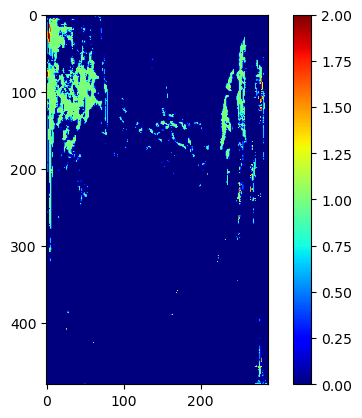

In [112]:
output_classes = torch.argmax(img_f, dim=1)
output_image = output_classes.squeeze().cpu().numpy()
plt.imshow(output_image, cmap='jet')  # Mostrar usando el mapa de colores 'jet' para resaltar las clases
plt.colorbar()  # Agregar una barra de colores para ver las clases
plt.show()

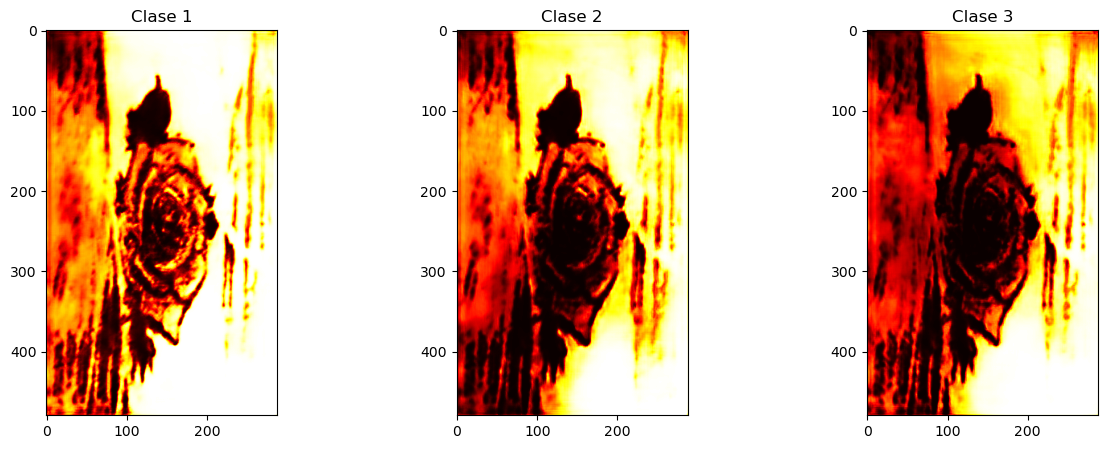

In [113]:
# Normalizar la salida de Tanh para que esté en el rango [0, 1]
output_normalized = (img_f + 1) / 2  # Normalización: de [-1, 1] a [0, 1]

# Para cada canal, tomar la imagen correspondiente
output_channel1 = output_normalized[0, 0, :, :].detach().cpu().numpy()  # Canal 1 (Clase 1)
output_channel2 = output_normalized[0, 1, :, :].detach().cpu().numpy()  # Canal 2 (Clase 2)
output_channel3 = output_normalized[0, 2, :, :].detach().cpu().numpy()  # Canal 3 (Clase 3)

# Mostrar cada canal
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(output_channel1, cmap='hot')  # Canal 1
axs[0].set_title('Clase 1')
axs[1].imshow(output_channel2, cmap='hot')  # Canal 2
axs[1].set_title('Clase 2')
axs[2].imshow(output_channel3, cmap='hot')  # Canal 3
axs[2].set_title('Clase 3')

plt.show()

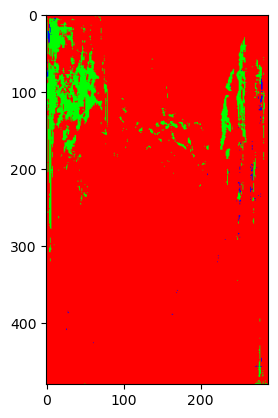

In [114]:
# Mapear las clases a colores
class_colors = {
    0: [255, 0, 0],  # Rojo para clase 0
    1: [0, 255, 0],  # Verde para clase 1
    2: [0, 0, 255]   # Azul para clase 2
}

# Convertir la salida de la clase en una imagen RGB
segmentation_image = torch.zeros((3, img_f.size(2), img_f.size(3)))  # Imagen RGB de 3 canales

for class_id, color in class_colors.items():
    mask = (output_classes == class_id).detach().cpu().numpy()  # Crear máscara para la clase
    for c in range(3):  # Para cada canal RGB
        segmentation_image[c] += mask * color[c]  # Asignar el color correspondiente a la clase

segmentation_image = segmentation_image.numpy().astype(np.uint8)  # Convertir a numpy para mostrar

# Mostrar la imagen
plt.imshow(segmentation_image.transpose(1, 2, 0))  # Cambiar el orden de los ejes para visualización
plt.show()

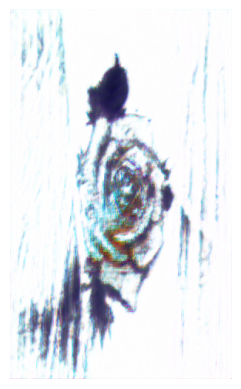

In [118]:
output_normalized = (template_f + 1) / 2  # Now it's in the range [0, 1]
# Assuming batch size of 1 (B = 1), select the first image in the batch
output_image = output_normalized[0].cpu().detach().numpy()  # Shape: (3, H, W)
# Transpose to (H, W, 3)
output_image = output_image.transpose(1, 2, 0)

# Now output_image is in the correct format for displaying
import matplotlib.pyplot as plt
plt.imshow(output_image)
plt.axis('off')  # Turn off axis for a cleaner image
plt.show()

In [116]:
# Obtener el Top-5
probabilities = torch.nn.functional.softmax(emb_template_f[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)

# Mostrar los resultados Top-5
for i in range(top5_prob.size(0)):
    print(f"Clase {top5_catid[i].item()}, probabilidad: {top5_prob[i].item():.4f}")

Clase 107, probabilidad: 0.0051
Clase 147, probabilidad: 0.0049
Clase 246, probabilidad: 0.0048
Clase 209, probabilidad: 0.0048
Clase 115, probabilidad: 0.0048


In [117]:
# Obtener el Top-5
probabilities = torch.nn.functional.softmax(emb_image_f[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)

# Mostrar los resultados Top-5
for i in range(top5_prob.size(0)):
    print(f"Clase {top5_catid[i].item()}, probabilidad: {top5_prob[i].item():.4f}")

Clase 226, probabilidad: 0.0058
Clase 198, probabilidad: 0.0052
Clase 249, probabilidad: 0.0051
Clase 13, probabilidad: 0.0051
Clase 30, probabilidad: 0.0050


In [107]:
import torch.nn.functional as F

# Apply softmax to convert logits to probabilities
probs = F.softmax(emb_template_f, dim=1)

# Get the top-5 predicted classes (indices) and their probabilities
top5_probs, top5_classes = torch.topk(probs, 5)

# Convert the top 5 class indices and probabilities to numpy arrays for easier handling
top5_probs = top5_probs.cpu().detach().numpy().flatten()
top5_classes = top5_classes.cpu().detach().numpy().flatten()

# Assuming you have a list of class labels (replace with actual class names)
class_labels = ["class_0", "class_1", "class_2", ..., "class_255"]  # Replace with actual class labels

# Get the top 5 class labels
top5_labels = [class_labels[idx] for idx in top5_classes]

# Print the top 5 predictions
print("Top-5 Predictions:")
for i in range(5):
    print(f"{i+1}. {top5_labels[i]} - Probability: {top5_probs[i]:.4f}")

# Display the image with the top-5 predictions as the title
plt.imshow(input_image)
plt.title("Top-5 Predictions:\n" + "\n".join([f"{top5_labels[i]} ({top5_probs[i]:.4f})" for i in range(5)]))
plt.axis('off')  # Hide axes for cleaner display
plt.show()

IndexError: list index out of range